# Word cloud de seguidores de Instagram

Para este proyecto debemos instalar los modulo:
* wordcloud: modulo para generar de nubes de palabras 
* pillow: modulo para tratamiento de imagenes
* pandas: modulo cool para tratamiendo de datos
* matplotlib: modulo para desplegar graficos
Una vez tenemos intalados estos modulos los importamos en nuestro proyecto

In [5]:
import json
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from  datetime import datetime


Cargamos el archivo **followers.json**

In [6]:
file = open('followers.json',) 
connections_data = json.load(file)


Estudiamos un poco el **JSON** para ver que estructura tiene y que datos podemos extraer. 
En este caso la información que nos interesa se encuentra en la llave **relationships_followers** que tiene una lista donde cada elemento representa a un seguidor.

In [7]:
connections_data

{'relationships_followers': [{'title': '',
   'media_list_data': [],
   'string_list_data': [{'href': 'https://www.instagram.com/nataly_m101',
     'value': 'nataly_m101',
     'timestamp': 1667330299}]},
  {'title': '',
   'media_list_data': [],
   'string_list_data': [{'href': 'https://www.instagram.com/adriennatacke',
     'value': 'adriennatacke',
     'timestamp': 1667107208}]},
  {'title': '',
   'media_list_data': [],
   'string_list_data': [{'href': 'https://www.instagram.com/rod_5919',
     'value': 'rod_5919',
     'timestamp': 1667052750}]},
  {'title': '',
   'media_list_data': [],
   'string_list_data': [{'href': 'https://www.instagram.com/maximoandresnaveira',
     'value': 'maximoandresnaveira',
     'timestamp': 1666499697}]},
  {'title': '',
   'media_list_data': [],
   'string_list_data': [{'href': 'https://www.instagram.com/roman_17412',
     'value': 'roman_17412',
     'timestamp': 1666445514}]},
  {'title': '',
   'media_list_data': [],
   'string_list_data': [{'h

Para este caso solo nos interesa encontrar el nombre del usuario y la fecha desde que nos sigue.
Podemos observar que estos datos están en la llave **string_list_data** en cada elemento de la lista.

In [8]:
connections_data['relationships_followers']

[{'title': '',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/nataly_m101',
    'value': 'nataly_m101',
    'timestamp': 1667330299}]},
 {'title': '',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/adriennatacke',
    'value': 'adriennatacke',
    'timestamp': 1667107208}]},
 {'title': '',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/rod_5919',
    'value': 'rod_5919',
    'timestamp': 1667052750}]},
 {'title': '',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/maximoandresnaveira',
    'value': 'maximoandresnaveira',
    'timestamp': 1666499697}]},
 {'title': '',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/roman_17412',
    'value': 'roman_17412',
    'timestamp': 1666445514}]},
 {'title': '',
  'media_list_data': [],
  'string_list_data': [{'href': 'https://www.instagram.com/andr3wr0drigu3z',
    

Ahora vamos a cargar nuestro **JSON** a un DataFrame con el nombre **df_followers** utilizando la función **json_normalize** de pandas de la siguiente forma:
* En el atributo **data** asignaremos el la lista de seguidores a la que accedemos con **connections_data['relationships_followers']**
* En el atributo **record_path** pondremos la llave **string_list_data** para que pandas sepa que datos queremos extraer de cada elemento de la lista


In [10]:
df_followers=pd.json_normalize(data=connections_data['relationships_followers'],record_path=['string_list_data'])

Como resultado tenemos la siguiente estructura con los datos que nos interesan para aplicar algunas transformaciones

In [11]:
df_followers

,href,value,timestamp
0,https://www.instagram.com/nataly_m101,nataly_m101,1667330299
1,https://www.instagram.com/adriennatacke,adriennatacke,1667107208
2,https://www.instagram.com/rod_5919,rod_5919,1667052750
3,https://www.instagram.com/maximoandresnaveira,maximoandresnaveira,1666499697
4,https://www.instagram.com/roman_17412,roman_17412,1666445514
...,...,...,...
1111,https://www.instagram.com/ronytic,ronytic,1589543708
1112,https://www.instagram.com/datavriksh,datavriksh,1589540628
1113,https://www.instagram.com/franko.barrera,franko.barrera,1589505080
1114,https://www.instagram.com/keniametap,keniametap,1589424995


## Preparando los datos

Primero vamos a eliminar todas las filas que tengan algun atribubo en NAN y aplicamos el resultado de esta limpieza en nuestro **df_followers** con **inplace=True**

In [12]:
df_followers.dropna(inplace=True)

In [13]:
df_followers['date'] = pd.to_datetime(df_followers['timestamp'], unit='s')

In [14]:
df_followers

,href,value,timestamp,date
0,https://www.instagram.com/nataly_m101,nataly_m101,1667330299,2022-11-01 19:18:19
1,https://www.instagram.com/adriennatacke,adriennatacke,1667107208,2022-10-30 05:20:08
2,https://www.instagram.com/rod_5919,rod_5919,1667052750,2022-10-29 14:12:30
3,https://www.instagram.com/maximoandresnaveira,maximoandresnaveira,1666499697,2022-10-23 04:34:57
4,https://www.instagram.com/roman_17412,roman_17412,1666445514,2022-10-22 13:31:54
...,...,...,...,...
1111,https://www.instagram.com/ronytic,ronytic,1589543708,2020-05-15 11:55:08
1112,https://www.instagram.com/datavriksh,datavriksh,1589540628,2020-05-15 11:03:48
1113,https://www.instagram.com/franko.barrera,franko.barrera,1589505080,2020-05-15 01:11:20
1114,https://www.instagram.com/keniametap,keniametap,1589424995,2020-05-14 02:56:35


Creamos una función **word_size** que nos devolverá el numero de días que han pasado desde que un usuario nos empezó a seguir y este valos nos servira para asignar un tamaño al nombre de cada usuario en nuestra nube de palabras

In [15]:
def word_size(date):
    d1 = datetime.now()
    difference = abs((date - d1).days)
    return difference if difference >0 else 1

In [16]:
df_followers['size']=df_followers['date'].apply(word_size)

In [28]:
df_followers

,href,value,timestamp,date,size
0,https://www.instagram.com/nataly_m101,nataly_m101,1667330299,2022-11-01 19:18:19,1
1,https://www.instagram.com/adriennatacke,adriennatacke,1667107208,2022-10-30 05:20:08,3
2,https://www.instagram.com/rod_5919,rod_5919,1667052750,2022-10-29 14:12:30,4
3,https://www.instagram.com/maximoandresnaveira,maximoandresnaveira,1666499697,2022-10-23 04:34:57,10
4,https://www.instagram.com/roman_17412,roman_17412,1666445514,2022-10-22 13:31:54,11
...,...,...,...,...,...
1111,https://www.instagram.com/ronytic,ronytic,1589543708,2020-05-15 11:55:08,901
1112,https://www.instagram.com/datavriksh,datavriksh,1589540628,2020-05-15 11:03:48,901
1113,https://www.instagram.com/franko.barrera,franko.barrera,1589505080,2020-05-15 01:11:20,901
1114,https://www.instagram.com/keniametap,keniametap,1589424995,2020-05-14 02:56:35,902


In [29]:
df_followers[['value','size']]

,value,size
0,nataly_m101,1
1,adriennatacke,3
2,rod_5919,4
3,maximoandresnaveira,10
4,roman_17412,11
...,...,...
1111,ronytic,901
1112,datavriksh,901
1113,franko.barrera,901
1114,keniametap,902


In [37]:
dict_followers =  df_followers[['value','size']].to_dict(orient="records")
dict_followers[0]

{'value': 'nataly_m101', 'size': 1}

Cambiamos el formato de la columna **date_follow** para tomar solamente la el día, mes y año de la fecha.

Aplicamos la función **word_size** sobre la columna **date_follow** y lo almacenamos en una nueva columna **size**

Convertimos el resultado en un diccionario que tenga las columnas **user_name** como key y **size** como value, que son el nombre del usuario y el tamaño de la palabra respectivamente.

In [38]:
followers_size={}

In [39]:
for follower in dict_followers:
    followers_size[follower['value']]=follower['size']

In [40]:
followers_size

{'nataly_m101': 1,
 'adriennatacke': 3,
 'rod_5919': 4,
 'maximoandresnaveira': 10,
 'roman_17412': 11,
 'andr3wr0drigu3z': 11,
 'blue_javazz': 11,
 'jasonborges77': 12,
 'aranzazu_a_s': 16,
 'alva6as': 17,
 '_bogar_am': 18,
 'elvaizumi': 21,
 'ing.jburgos': 26,
 'federicogabriel.sanchez': 30,
 'analiticadeimpacto': 31,
 'natalia_valderramo': 42,
 'anitakuhn': 42,
 'sarai_toizer': 45,
 'nataliporto87': 45,
 'x08000': 45,
 'luorlov': 45,
 'fredy.jacob.737': 45,
 'j_zarate_26': 45,
 'rei.vajj': 45,
 'javierdc.27': 45,
 'ayushen.cayu': 46,
 '60niwde_': 46,
 'molly_de_marte': 46,
 'j06vrly': 46,
 'catsmu_': 46,
 'tomas.godoy14': 46,
 'msxrkemmer_': 46,
 'chuquituctoronal23': 46,
 'romi_nina': 46,
 'simplemente.santiago': 46,
 'julian.c.8': 46,
 'negro__blanco_': 46,
 'centurion593': 46,
 'jairgh': 46,
 'mik3rlin01': 46,
 'mariany.gomez': 46,
 'pablo_acuna': 46,
 'breaks580zzzz_': 46,
 '_gsusl': 47,
 'yasmin.diaz.ok': 47,
 'jimeevoltarel': 47,
 '_.sofiaa4._': 47,
 'danirivas.09': 47,
 'lina

## Visualizando el Word cloud
Para visualizar los nombres de mis seguidores en esta especial ocasión decidí crear una imagen para usarla de base en el word cloud puedes encontrar la imagen es este repositorio como **500_gracias.png**


Cargamos la imagen de base

In [41]:
mask = np.array(Image.open(f"500_gracias.png"))

Usaremos la fuente **phagspab** para darle estilo a las palabras de mi grafico

In [43]:
font_path = 'C:/Windows/Fonts/%s'%'phagspab.ttf'

Definimos los parámetros de nuestro world cloud   
* **max_font_size:** tamaño máximo de palabra en la imagen
* **max_words:** número máximo de palabras a graficar
* **width:** ancho de la imagen
* **height:** alto de la imagen
* **background_color:** color de fondo de la imagen
* **mask:** mascara de la imagen

In [49]:
param_wordcloud = {'max_font_size':256, 
                   'max_words':2000, 
                   'width':1500, 
                   'height':1500,
                   'background_color':"white", 
                   'font_path':font_path,
                   'mask': mask}

Definimos nuestro word cloud en **wc** y con la función **fit_words** le asignamos el diccionario de palabras y los respectivos tamaños de las mismas.

In [50]:
wc = WordCloud(**param_wordcloud)
wc.fit_words(followers_size)

Adaptamos los colores de la imagen a los colores de nuestra imagen base, desactivamos axis del grafico y mostramos el grafico

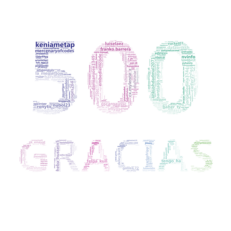

In [51]:
image_colors = ImageColorGenerator(mask)
plt.figure()
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

Si queremos guardar nuestro word cloud en una imagen lo podemos hacer con la siguiente línea

In [52]:
wc.to_file('gracias.png')